In [128]:
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical

#from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import Accuracy

import matplotlib.pyplot as plt


In [129]:
from keras.datasets import fashion_mnist
(x_train, y_train_labels), (x_test, y_test_labels) = fashion_mnist.load_data()

In [130]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [131]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)
y_train

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [132]:
x_train = x_train/255.0
x_test = x_test/255.0

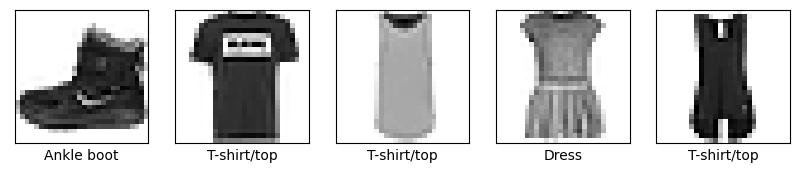

In [144]:
plt.figure(figsize=(10,10))

for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])

plt.show()

In [149]:
model = Sequential([
    # transforming 2d -> to 1d vector by flatten
    # it's not NN layer it's just transform
    Flatten(input_shape=(28,28)),
    # The first NN layer
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    # The second (output) NN layer
    Dense(10, activation='sigmoid')
])

model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_18 (Flatten)        (None, 784)               0         
                                                                 
 dense_49 (Dense)            (None, 200)               157000    
                                                                 
 dense_50 (Dense)            (None, 200)               40200     
                                                                 
 dense_51 (Dense)            (None, 10)                2010      
                                                                 
Total params: 199210 (778.16 KB)
Trainable params: 199210 (778.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [150]:
model.compile(optimizer=Adam(),loss='mse',metrics=['accuracy'])

In [151]:
model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test,y_test) )

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0421 - accuracy: 0.7011 - val_loss: 0.0268 - val_accuracy: 0.8189
Epoch 2/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0227 - accuracy: 0.8480 - val_loss: 0.0223 - val_accuracy: 0.8497
Epoch 3/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0200 - accuracy: 0.8669 - val_loss: 0.0212 - val_accuracy: 0.8556
Epoch 4/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0183 - accuracy: 0.8781 - val_loss: 0.0210 - val_accuracy: 0.8574
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0174 - accuracy: 0.8829 - val_loss: 0.0195 - val_accuracy: 0.8666
Epoch 6/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0164 - accuracy: 0.8906 - val_loss: 0.0186 - val_accuracy: 0.8752
Epoch 7/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0157 - accuracy: 0.8943 - val_loss: 0.0188 - val_accuracy: 0.8724

Epoch 58/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0048 - accuracy: 0.9710 - val_loss: 0.0170 - val_accuracy: 0.8934
Epoch 59/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0046 - accuracy: 0.9722 - val_loss: 0.0172 - val_accuracy: 0.8921
Epoch 60/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0045 - accuracy: 0.9724 - val_loss: 0.0172 - val_accuracy: 0.8942
Epoch 61/100
235/235 [==============================] - 2s 7ms/step - loss: 0.0046 - accuracy: 0.9725 - val_loss: 0.0164 - val_accuracy: 0.8982
Epoch 62/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0047 - accuracy: 0.9714 - val_loss: 0.0171 - val_accuracy: 0.8941
Epoch 63/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0044 - accuracy: 0.9736 - val_loss: 0.0168 - val_accuracy: 0.8972
Epoch 64/100
235/235 [==============================] - 2s 6ms/step - loss: 0.0044 - accuracy: 0.9735 - val_loss: 0.0175 - val_accuracy:

In [154]:
loss, accuracy = model.evaluate(x_test,y_test,verbose=2)
print (loss,accuracy)

313/313 - 1s - loss: 0.0180 - accuracy: 0.8944 - 544ms/epoch - 2ms/step
0.017965883016586304 0.8944000005722046


In [153]:
y_pred=model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [95]:
y_pred[0]

array([1.02740705e-05, 5.38050301e-07, 1.24230337e-06, 2.01738862e-06,
       2.65081940e-06, 4.35018956e-05, 1.24577957e-06, 7.20225798e-05,
       1.75911446e-05, 9.99958992e-01], dtype=float32)